## 🎉 **EDA COMPLETED SUCCESSFULLY!**

### ✅ **Stage 1 Summary (Weeks 1-4):**
- **Week 1**: ✅ Project setup and documentation  
- **Week 2**: ✅ Data acquisition and initial analysis
- **Week 3**: ✅ Deep data analysis and feature engineering
- **Week 4**: ✅ Baseline models development

### 📊 **Key Achievements:**
- 📈 Complete data exploration và visualization
- 🔧 Rich feature engineering pipeline  
- 💾 Processed datasets ready for ML models
- 🤖 4 baseline models với performance benchmarks
- 📏 Comprehensive evaluation framework

### 🚀 **Next: Stage 2 - Machine Learning Model Development**
- **Week 5**: Traditional Collaborative Filtering
- **Week 6**: Matrix Factorization Techniques
- **Week 7**: Content-Based Filtering  
- **Week 8-9**: Deep Learning Approaches
- **Week 10**: Hybrid Models và Model Selection

---

**🎯 Ready to begin advanced ML model development!**

In [2]:
# -*- coding: utf-8 -*-
# =============================================================================
# EXPLORATORY DATA ANALYSIS (EDA) FOR MOVIE RECOMMENDER SYSTEM
# VS Code Environment Setup
#
# SETUP INSTRUCTIONS:
# 1. Ensure you have Python environment activated in VS Code
# 2. Install required packages using the cell below
# 3. MovieLens dataset should be in ./movie/ml-latest-small/ directory
# 4. Run cells sequentially using Shift + Enter or Run All
# =============================================================================

# --- Step 0: Install Required Libraries ---
# Install seaborn and other required packages for VS Code environment
%pip install seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split

# Set up matplotlib for VS Code
%matplotlib inline

# Set style for better plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries loaded successfully!")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Libraries loaded successfully!


In [3]:
# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================

def load_movielens_data(data_dir='./movie/ml-latest-small'):
    """
    Load MovieLens dataset with proper error handling
    
    Args:
        data_dir (str): Path to MovieLens dataset directory
        
    Returns:
        tuple: (ratings_df, movies_df, tags_df, links_df)
    """
    data_dir = Path(data_dir)
    
    # Define file paths
    ratings_path = data_dir / 'ratings.csv'
    movies_path = data_dir / 'movies.csv'
    tags_path = data_dir / 'tags.csv'
    links_path = data_dir / 'links.csv'
    
    # Check if data directory exists
    if not data_dir.exists():
        print(f"❌ ERROR: Data directory not found at {data_dir}")
        print("Please ensure MovieLens dataset is placed in the correct directory structure:")
        print("./movie/ml-latest-small/")
        print("  ├── ratings.csv")
        print("  ├── movies.csv") 
        print("  ├── tags.csv")
        print("  └── links.csv")
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    try:
        print(f"📂 Loading data from: {data_dir}")
        ratings_df = pd.read_csv(ratings_path)
        movies_df = pd.read_csv(movies_path)
        tags_df = pd.read_csv(tags_path)
        links_df = pd.read_csv(links_path)
        
        print("✅ Successfully loaded all CSV files.")
        print(f"\n📊 Dataset Overview:")
        print(f"   Ratings: {len(ratings_df):,} records")
        print(f"   Movies: {len(movies_df):,} records") 
        print(f"   Tags: {len(tags_df):,} records")
        print(f"   Links: {len(links_df):,} records")
        
        return ratings_df, movies_df, tags_df, links_df
        
    except FileNotFoundError as e:
        print(f"❌ ERROR: Could not find data files.")
        print(f"Missing file: {e}")
        print("\nPlease ensure MovieLens ml-latest-small dataset is extracted to:")
        print("./movie/ml-latest-small/")
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

def display_dataset_info(ratings_df, movies_df, tags_df):
    """
    Display basic information about the datasets
    
    Args:
        ratings_df, movies_df, tags_df: DataFrames to analyze
    """
    if ratings_df.empty or movies_df.empty:
        print("⚠️  No data to display")
        return
    
    print("\n" + "="*50)
    print("📋 DATASET INFORMATION")
    print("="*50)
    
    # Ratings dataset info
    print("\n🎯 RATINGS DATASET:")
    print("-" * 20)
    ratings_df.info()
    print("\nFirst 5 rows:")
    print(ratings_df.head())
    
    # Movies dataset info
    print("\n🎬 MOVIES DATASET:")
    print("-" * 20)
    movies_df.info()
    print("\nFirst 5 rows:")
    print(movies_df.head())
    
    # Tags dataset info
    print("\n🏷️  TAGS DATASET:")
    print("-" * 20)
    tags_df.info()
    print("\nFirst 5 rows:")
    print(tags_df.head())
    
    # Missing data analysis
    print("\n🔍 MISSING DATA ANALYSIS:")
    print("-" * 25)
    print("Missing data in ratings.csv:")
    print(ratings_df.isnull().sum())
    print("\nMissing data in movies.csv:")
    print(movies_df.isnull().sum())
    print("\nMissing data in tags.csv:")
    print(tags_df.isnull().sum())

def safe_execute(func, *args, **kwargs):
    """
    Safely execute a function with error handling
    
    Args:
        func: Function to execute
        *args, **kwargs: Arguments for the function
    """
    try:
        return func(*args, **kwargs)
    except Exception as e:
        print(f"⚠️  Error executing {func.__name__}: {e}")
        return None

print("✅ Utility functions loaded successfully!")

✅ Utility functions loaded successfully!


In [4]:
# =============================================================================
# DATA LOADING
# =============================================================================

print("🚀 Starting data loading process...")

# Load the MovieLens dataset
ratings_df, movies_df, tags_df, links_df = load_movielens_data()

# Display dataset information if data was loaded successfully
if not ratings_df.empty and not movies_df.empty:
    display_dataset_info(ratings_df, movies_df, tags_df)
    
    # Create merged dataset for analysis
    movie_ratings_df = pd.merge(ratings_df, movies_df, on='movieId')
    print(f"\n✅ Created merged dataset with {len(movie_ratings_df):,} records")
else:
    print("❌ Data loading failed. Please check setup instructions.")
    movie_ratings_df = pd.DataFrame()

🚀 Starting data loading process...
📂 Loading data from: movie\ml-latest-small
✅ Successfully loaded all CSV files.

📊 Dataset Overview:
   Ratings: 100,836 records
   Movies: 9,742 records
   Tags: 3,683 records
   Links: 9,742 records

📋 DATASET INFORMATION

🎯 RATINGS DATASET:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

First 5 rows:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

🎬 MOVIES DATASET:
--------------------
<class 'pan

In [5]:
# =============================================================================
# VISUALIZATION FUNCTIONS
# =============================================================================

def plot_rating_distribution(ratings_df):
    """
    Plot the distribution of movie ratings
    
    Args:
        ratings_df: DataFrame containing ratings data
    """
    if ratings_df.empty:
        print("⚠️  No data to plot")
        return
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=ratings_df, palette='viridis')
    plt.title('Distribution of Movie Ratings', fontsize=16, fontweight='bold')
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Number of Ratings', fontsize=12)
    
    # Add count labels on bars
    for i, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f'{int(p.get_height()):,}', 
                          (p.get_x() + p.get_width()/2., p.get_height()),
                          ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

def plot_genre_distribution(movies_df):
    """
    Plot the distribution of movie genres
    
    Args:
        movies_df: DataFrame containing movies data
    """
    if movies_df.empty:
        print("⚠️  No data to plot")
        return
    
    # Split genres and count them
    genres_series = movies_df['genres'].str.split('|', expand=True).stack()
    genre_counts = genres_series.value_counts()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='mako')
    plt.title('Distribution of Movie Genres', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    
    # Add count labels
    for i, v in enumerate(genre_counts.values):
        plt.text(v + 20, i, f'{v:,}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

def plot_top_movies(movie_ratings_df, by='count', top_n=10, min_ratings=50):
    """
    Plot top movies by rating count or average rating
    
    Args:
        movie_ratings_df: Merged DataFrame with movies and ratings
        by: 'count' for most rated, 'rating' for highest rated
        top_n: Number of top movies to show
        min_ratings: Minimum number of ratings for 'rating' analysis
    """
    if movie_ratings_df.empty:
        print("⚠️  No data to plot")
        return
    
    if by == 'count':
        # Most rated movies
        movie_counts = movie_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False)
        top_movies = movie_counts.head(top_n)
        
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(top_movies)), top_movies.values)
        plt.yticks(range(len(top_movies)), [title[:50] + '...' if len(title) > 50 else title 
                                          for title in top_movies.index])
        plt.xlabel('Number of Ratings', fontsize=12)
        plt.title(f'Top {top_n} Most Rated Movies', fontsize=16, fontweight='bold')
        
    elif by == 'rating':
        # Highest rated movies (with minimum ratings threshold)
        movie_stats = movie_ratings_df.groupby('title')['rating'].agg(['count', 'mean']).round(2)
        movie_stats = movie_stats[movie_stats['count'] >= min_ratings]
        top_movies = movie_stats.sort_values('mean', ascending=False).head(top_n)
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(top_movies)), top_movies['mean'], 
                       color=sns.color_palette("coolwarm", len(top_movies)))
        plt.yticks(range(len(top_movies)), [title[:50] + '...' if len(title) > 50 else title 
                                          for title in top_movies.index])
        plt.xlabel('Average Rating', fontsize=12)
        plt.title(f'Top {top_n} Highest Rated Movies (≥{min_ratings} ratings)', 
                 fontsize=16, fontweight='bold')
        
        # Add rating labels
        for i, (bar, rating) in enumerate(zip(bars, top_movies['mean'])):
            plt.text(rating + 0.05, i, f'{rating:.2f}', va='center', fontsize=10)
    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("✅ Visualization functions loaded successfully!")

✅ Visualization functions loaded successfully!


📊 Starting basic data analysis...

🎯 RATING DISTRIBUTION ANALYSIS


C:\Users\nguye\AppData\Local\Temp\ipykernel_16996\3236583279.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


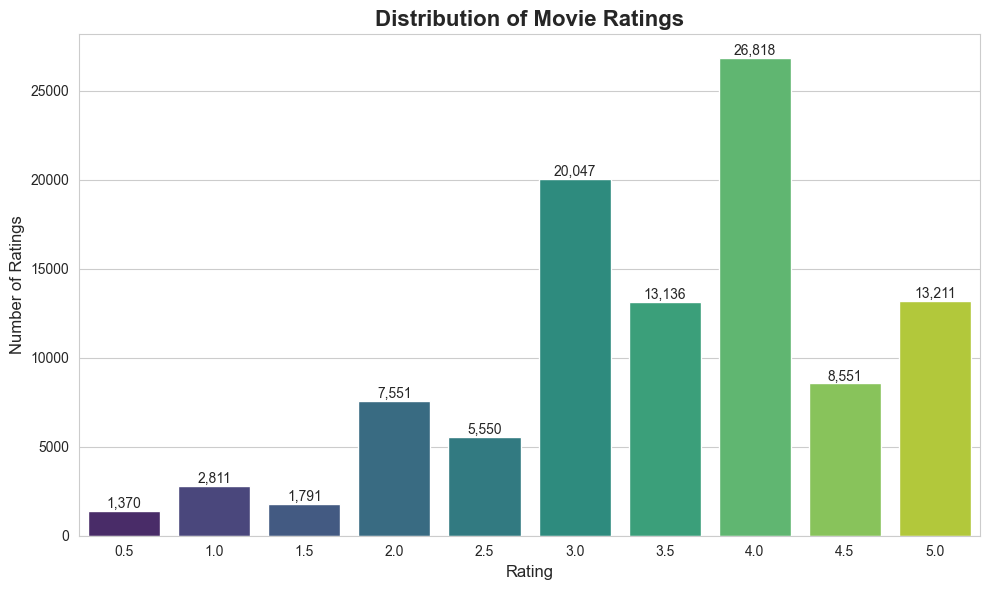


🎬 GENRE DISTRIBUTION ANALYSIS


C:\Users\nguye\AppData\Local\Temp\ipykernel_16996\3236583279.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='mako')


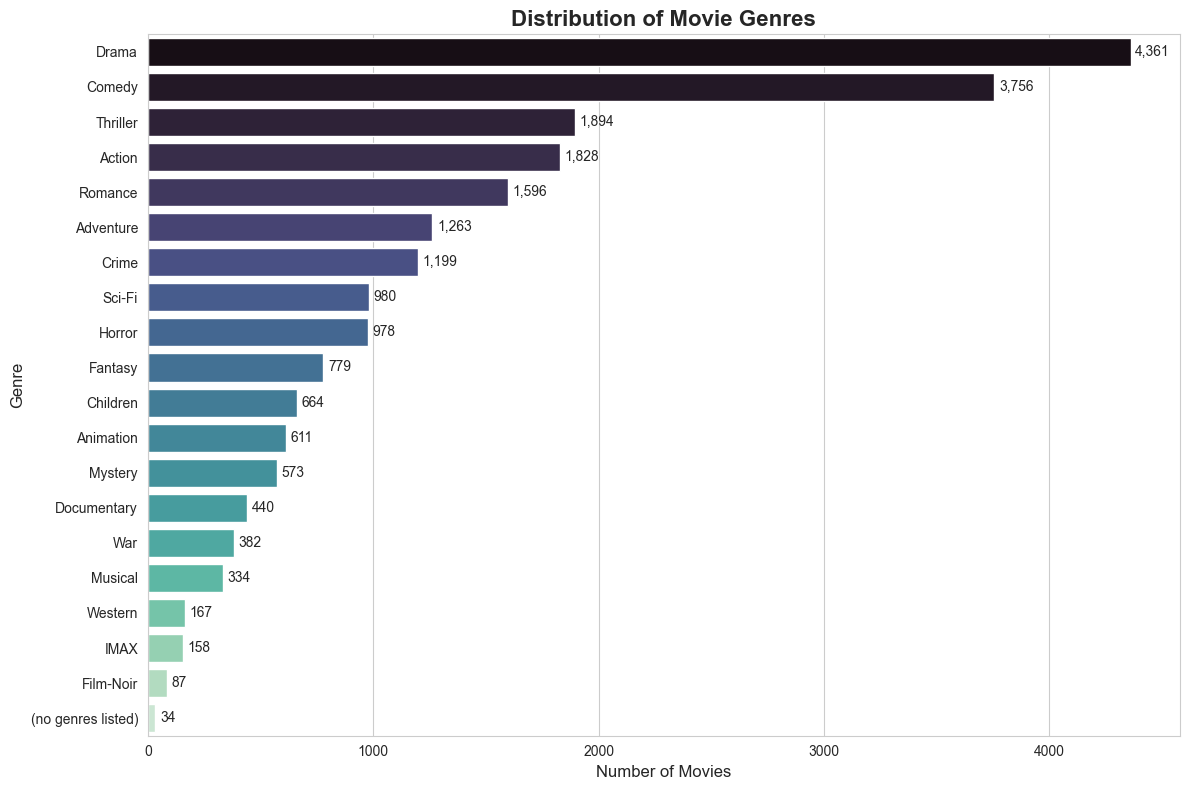


⭐ TOP MOVIES ANALYSIS
📈 Most Rated Movies:


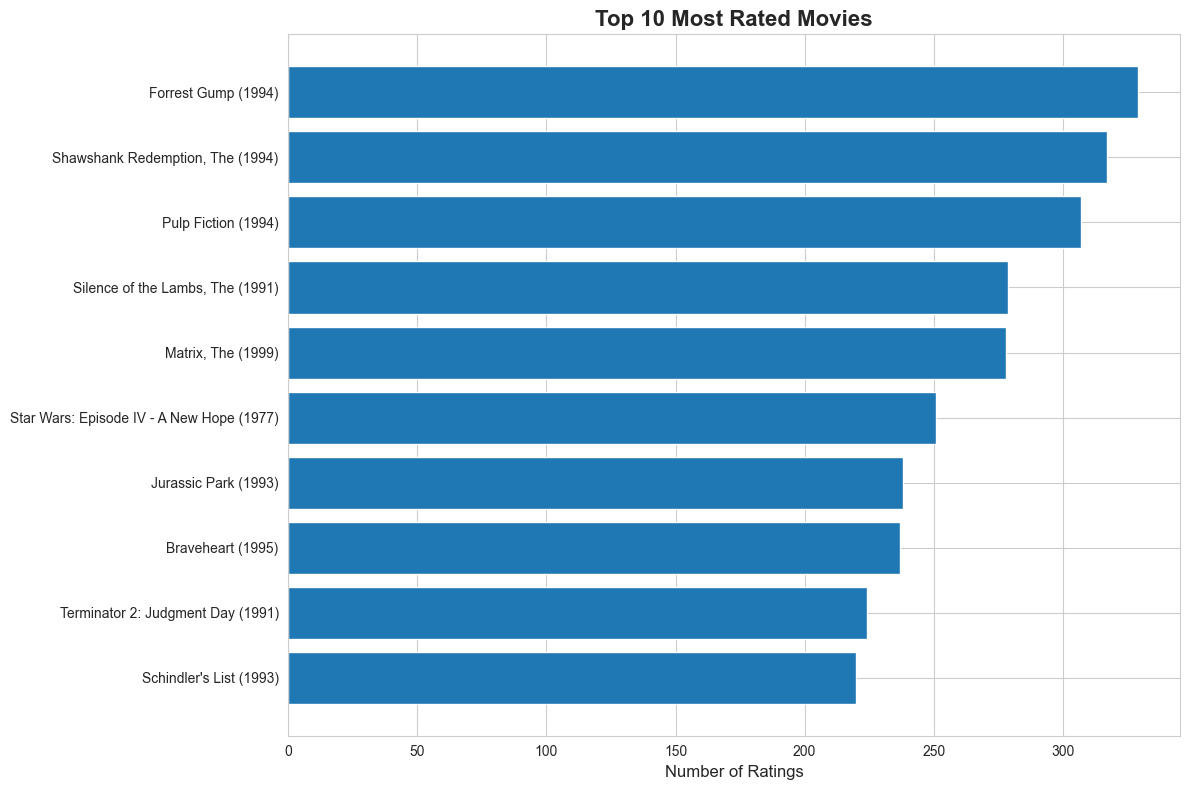


🏆 Highest Rated Movies:


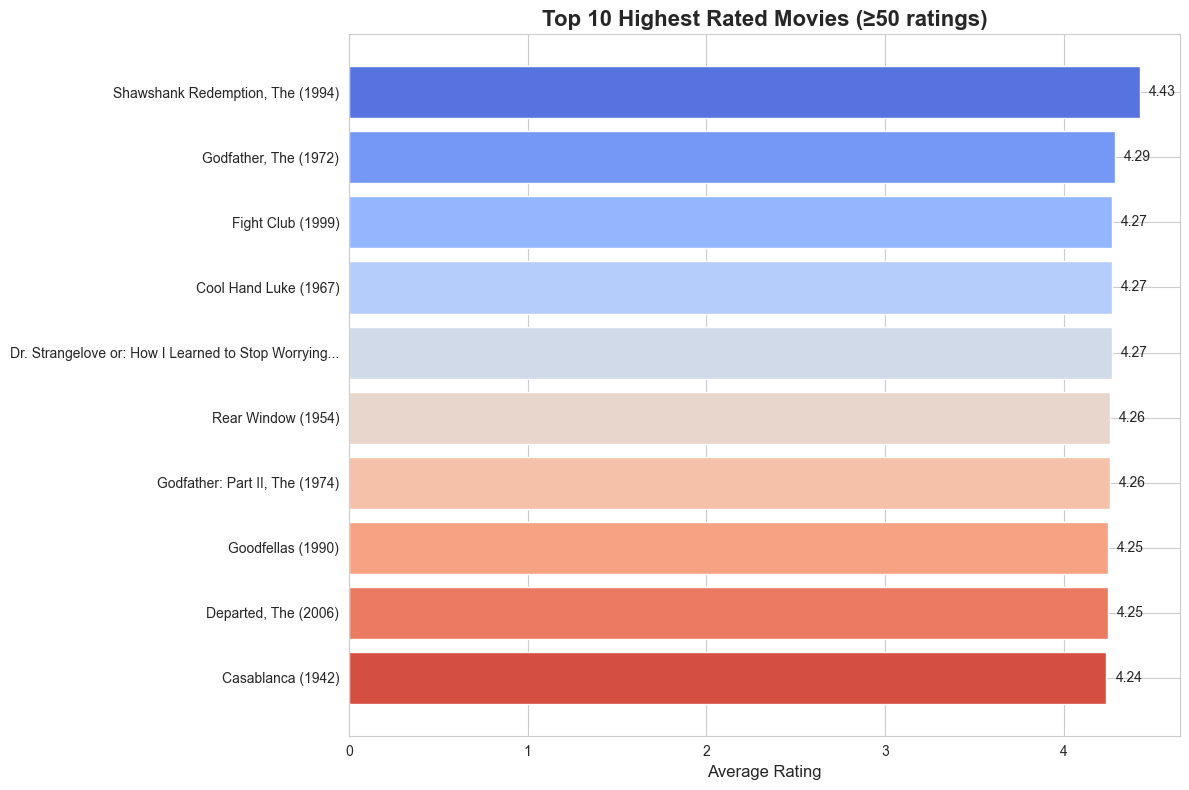


✅ Basic data analysis completed!


In [6]:
# =============================================================================
# BASIC DATA ANALYSIS
# =============================================================================

print("📊 Starting basic data analysis...")

# Only proceed if data was loaded successfully
if not ratings_df.empty and not movies_df.empty:
    
    print("\n🎯 RATING DISTRIBUTION ANALYSIS")
    print("="*40)
    plot_rating_distribution(ratings_df)
    
    print("\n🎬 GENRE DISTRIBUTION ANALYSIS") 
    print("="*40)
    plot_genre_distribution(movies_df)
    
    print("\n⭐ TOP MOVIES ANALYSIS")
    print("="*40)
    
    # Most rated movies
    print("📈 Most Rated Movies:")
    plot_top_movies(movie_ratings_df, by='count', top_n=10)
    
    # Highest rated movies
    print("\n🏆 Highest Rated Movies:")
    plot_top_movies(movie_ratings_df, by='rating', top_n=10, min_ratings=50)
    
    print("\n✅ Basic data analysis completed!")
    
else:
    print("⚠️  Skipping basic analysis - data not loaded")

In [7]:
# =============================================================================
# ADVANCED ANALYSIS FUNCTIONS
# =============================================================================

def analyze_temporal_patterns(ratings_df):
    """
    Analyze temporal patterns in rating behavior
    
    Args:
        ratings_df: DataFrame containing ratings with timestamp
    """
    if ratings_df.empty:
        print("⚠️  No data for temporal analysis")
        return
    
    # Convert timestamp to datetime
    ratings_temp = ratings_df.copy()
    ratings_temp['datetime'] = pd.to_datetime(ratings_temp['timestamp'], unit='s')
    ratings_temp['year'] = ratings_temp['datetime'].dt.year
    ratings_temp['month'] = ratings_temp['datetime'].dt.month
    ratings_temp['hour'] = ratings_temp['datetime'].dt.hour
    ratings_temp['day_of_week'] = ratings_temp['datetime'].dt.dayofweek

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Yearly trends
    yearly_ratings = ratings_temp.groupby('year').size()
    yearly_ratings.plot(kind='line', ax=axes[0,0])
    axes[0,0].set_title('Number of Ratings by Year')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Ratings')
    
    # Monthly patterns
    monthly_ratings = ratings_temp.groupby('month').size()
    monthly_ratings.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Ratings by Month')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Number of Ratings')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Hourly patterns
    hourly_ratings = ratings_temp.groupby('hour').size()
    hourly_ratings.plot(kind='line', ax=axes[1,0], marker='o')
    axes[1,0].set_title('Ratings by Hour of Day')
    axes[1,0].set_xlabel('Hour')
    axes[1,0].set_ylabel('Number of Ratings')
    
    # Day of week patterns
    dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_ratings = ratings_temp.groupby('day_of_week').size()
    dow_ratings.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Ratings by Day of Week')
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Number of Ratings')
    axes[1,1].set_xticks(range(7))
    axes[1,1].set_xticklabels(dow_labels)
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return ratings_temp

def analyze_user_behavior(ratings_df):
    """
    Analyze user behavior patterns
    
    Args:
        ratings_df: DataFrame containing ratings data
    """
    if ratings_df.empty:
        print("⚠️  No data for user behavior analysis")
        return None
    
    # Calculate user statistics
    user_stats = ratings_df.groupby('userId').agg({
        'rating': ['count', 'mean', 'std'],
        'movieId': 'nunique'
    }).round(2)
    user_stats.columns = ['num_ratings', 'avg_rating', 'rating_std', 'num_movies']
    user_stats['rating_std'] = user_stats['rating_std'].fillna(0)

    print("📊 USER BEHAVIOR STATISTICS:")
    print(user_stats.describe())
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Number of ratings per user
    axes[0,0].hist(user_stats['num_ratings'], bins=50, alpha=0.7, edgecolor='black')
    axes[0,0].set_title('Distribution of Ratings per User')
    axes[0,0].set_xlabel('Number of Ratings')
    axes[0,0].set_ylabel('Number of Users')
    axes[0,0].set_yscale('log')
    
    # Average rating per user
    axes[0,1].hist(user_stats['avg_rating'], bins=30, alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Distribution of Average Rating per User')
    axes[0,1].set_xlabel('Average Rating')
    axes[0,1].set_ylabel('Number of Users')
    
    # Activity vs rating relationship
    axes[1,0].scatter(user_stats['num_ratings'], user_stats['avg_rating'], alpha=0.5)
    axes[1,0].set_title('User Activity vs Average Rating')
    axes[1,0].set_xlabel('Number of Ratings')
    axes[1,0].set_ylabel('Average Rating')
    axes[1,0].set_xscale('log')
    
    # Rating standard deviation
    axes[1,1].hist(user_stats['rating_std'], bins=30, alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Distribution of Rating Std Dev per User')
    axes[1,1].set_xlabel('Rating Standard Deviation')
    axes[1,1].set_ylabel('Number of Users')
    
    plt.tight_layout()
    plt.show()
    
    return user_stats

def analyze_movie_popularity(movie_ratings_df):
    """
    Analyze movie popularity and rating patterns
    
    Args:
        movie_ratings_df: Merged DataFrame with movies and ratings
    """
    if movie_ratings_df.empty:
        print("⚠️  No data for movie popularity analysis")
        return None
    
    # Calculate movie statistics
    movie_stats = movie_ratings_df.groupby('title').agg({
        'rating': ['count', 'mean', 'std'],
        'userId': 'nunique'
    }).round(2)
    movie_stats.columns = ['num_ratings', 'avg_rating', 'rating_std', 'num_users']
    movie_stats['rating_std'] = movie_stats['rating_std'].fillna(0)

    print("🎬 MOVIE STATISTICS:")
    print(movie_stats.describe())
    
    # Cold start analysis
    print(f"\n🔍 COLD START ANALYSIS:")
    print(f"   Movies with only 1 rating: {(movie_stats['num_ratings'] == 1).sum():,}")
    print(f"   Movies with ≤ 5 ratings: {(movie_stats['num_ratings'] <= 5).sum():,}")
    print(f"   Movies with ≥ 100 ratings: {(movie_stats['num_ratings'] >= 100).sum():,}")

    # Sparsity analysis
    total_possible_ratings = len(movie_ratings_df['userId'].unique()) * len(movie_ratings_df['movieId'].unique())
    actual_ratings = len(movie_ratings_df)
    sparsity = 1 - (actual_ratings / total_possible_ratings)
    print(f"\n📊 DATASET SPARSITY: {sparsity:.4f} ({sparsity*100:.2f}% missing)")
    
    return movie_stats

def analyze_genre_preferences(movies_df, movie_ratings_df):
    """
    Analyze genre preferences and ratings
    
    Args:
        movies_df: DataFrame containing movie information
        movie_ratings_df: Merged DataFrame with movies and ratings
    """
    if movies_df.empty or movie_ratings_df.empty:
        print("⚠️  No data for genre analysis")
        return None
    
    # Create genre matrix
    genres_expanded = movies_df['genres'].str.get_dummies('|')
    movie_genres = pd.concat([movies_df[['movieId']], genres_expanded], axis=1)
    
    # Merge with ratings
    rating_genres = movie_ratings_df.merge(movie_genres, on='movieId')
    
    # Calculate average rating per genre
    genre_columns = [col for col in genres_expanded.columns 
                    if col not in ['(no genres listed)']]
    
    genre_ratings = {}
    for genre in genre_columns:
        genre_mask = rating_genres[genre] == 1
        if genre_mask.sum() > 0:
            genre_ratings[genre] = rating_genres.loc[genre_mask, 'rating'].mean()
    
    # Sort and visualize
    genre_ratings_sorted = dict(sorted(genre_ratings.items(), 
                                     key=lambda x: x[1], reverse=True))
    
    plt.figure(figsize=(12, 8))
    genres = list(genre_ratings_sorted.keys())
    ratings = list(genre_ratings_sorted.values())
    
    bars = plt.barh(genres, ratings, color=sns.color_palette("viridis", len(genres)))
    plt.title('Average Rating by Genre', fontsize=16, fontweight='bold')
    plt.xlabel('Average Rating', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    
    # Add rating labels
    for bar, rating in zip(bars, ratings):
        plt.text(rating + 0.02, bar.get_y() + bar.get_height()/2, 
                f'{rating:.2f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("🏷️ TOP 10 GENRE AVERAGE RATINGS:")
    for i, (genre, rating) in enumerate(list(genre_ratings_sorted.items())[:10]):
        print(f"   {i+1:2d}. {genre}: {rating:.2f}")
    
    return genre_ratings_sorted

print("✅ Advanced analysis functions loaded successfully!")

✅ Advanced analysis functions loaded successfully!


🔬 Starting advanced data analysis...

⏰ TEMPORAL PATTERNS ANALYSIS


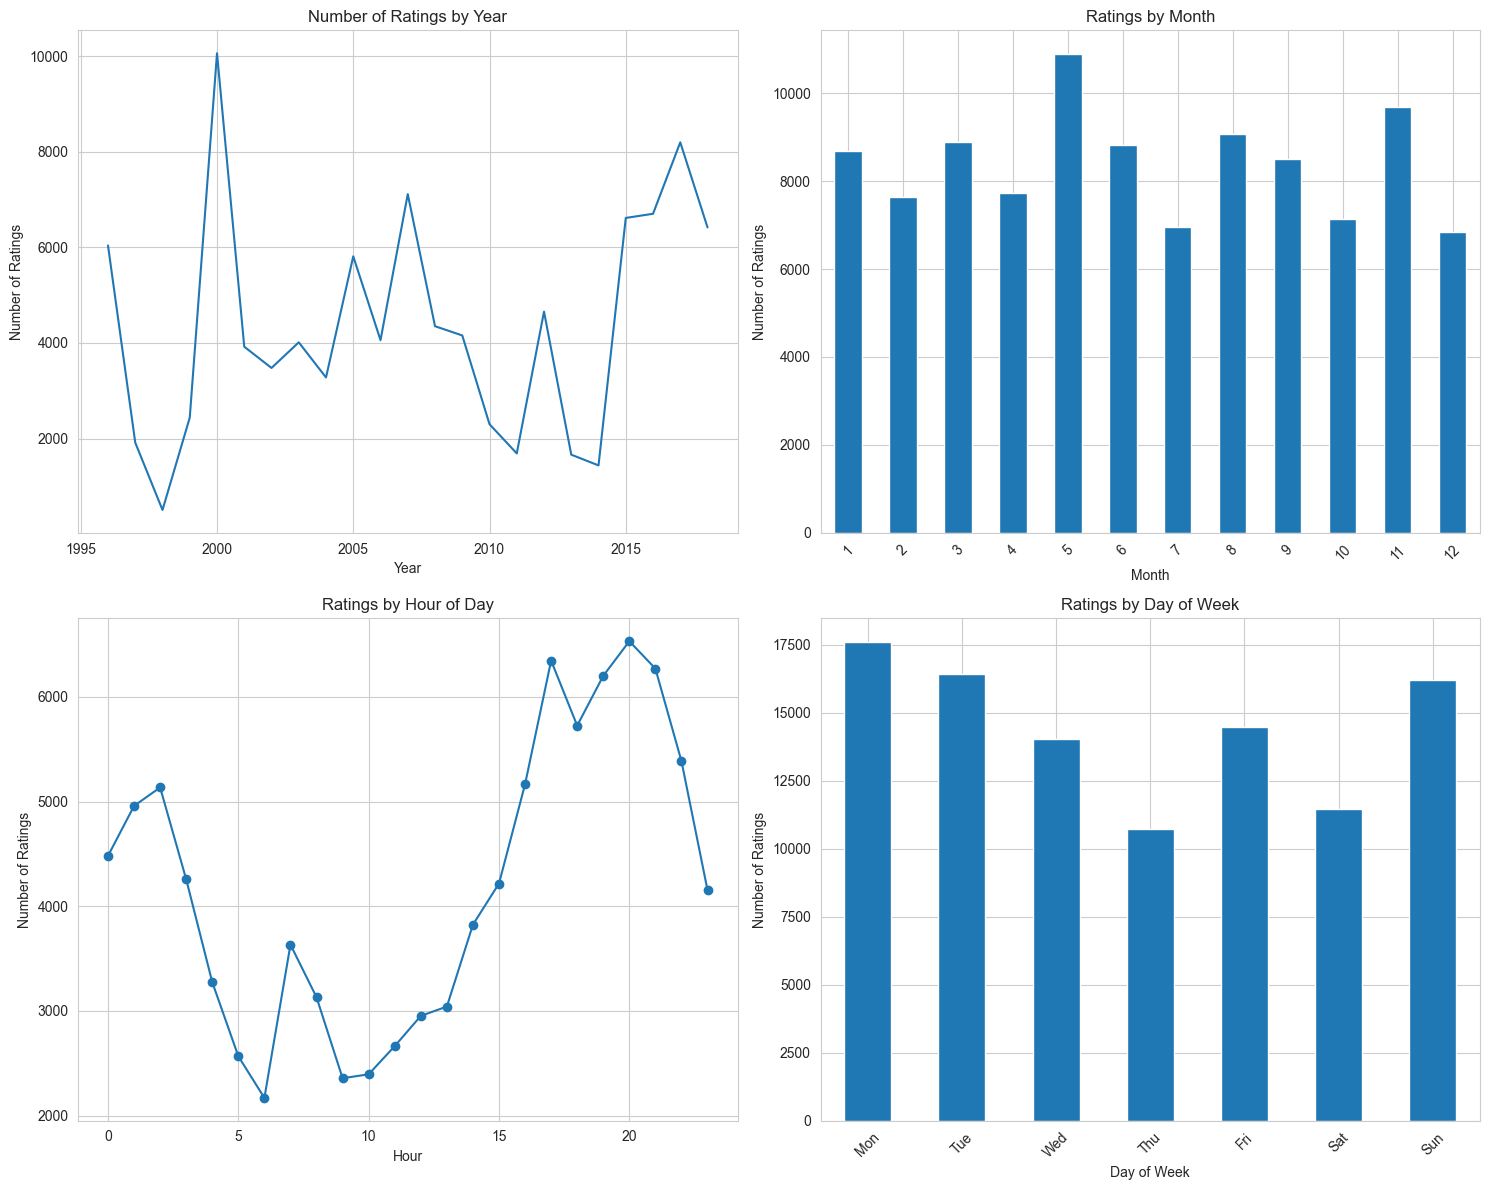


👥 USER BEHAVIOR ANALYSIS
📊 USER BEHAVIOR STATISTICS:
       num_ratings  avg_rating  rating_std   num_movies
count   610.000000  610.000000  610.000000   610.000000
mean    165.304918    3.657410    0.927246   165.304918
std     269.480584    0.480632    0.266127   269.480584
min      20.000000    1.270000    0.000000    20.000000
25%      35.000000    3.360000    0.740000    35.000000
50%      70.500000    3.695000    0.900000    70.500000
75%     168.000000    3.997500    1.080000   168.000000
max    2698.000000    5.000000    2.090000  2698.000000


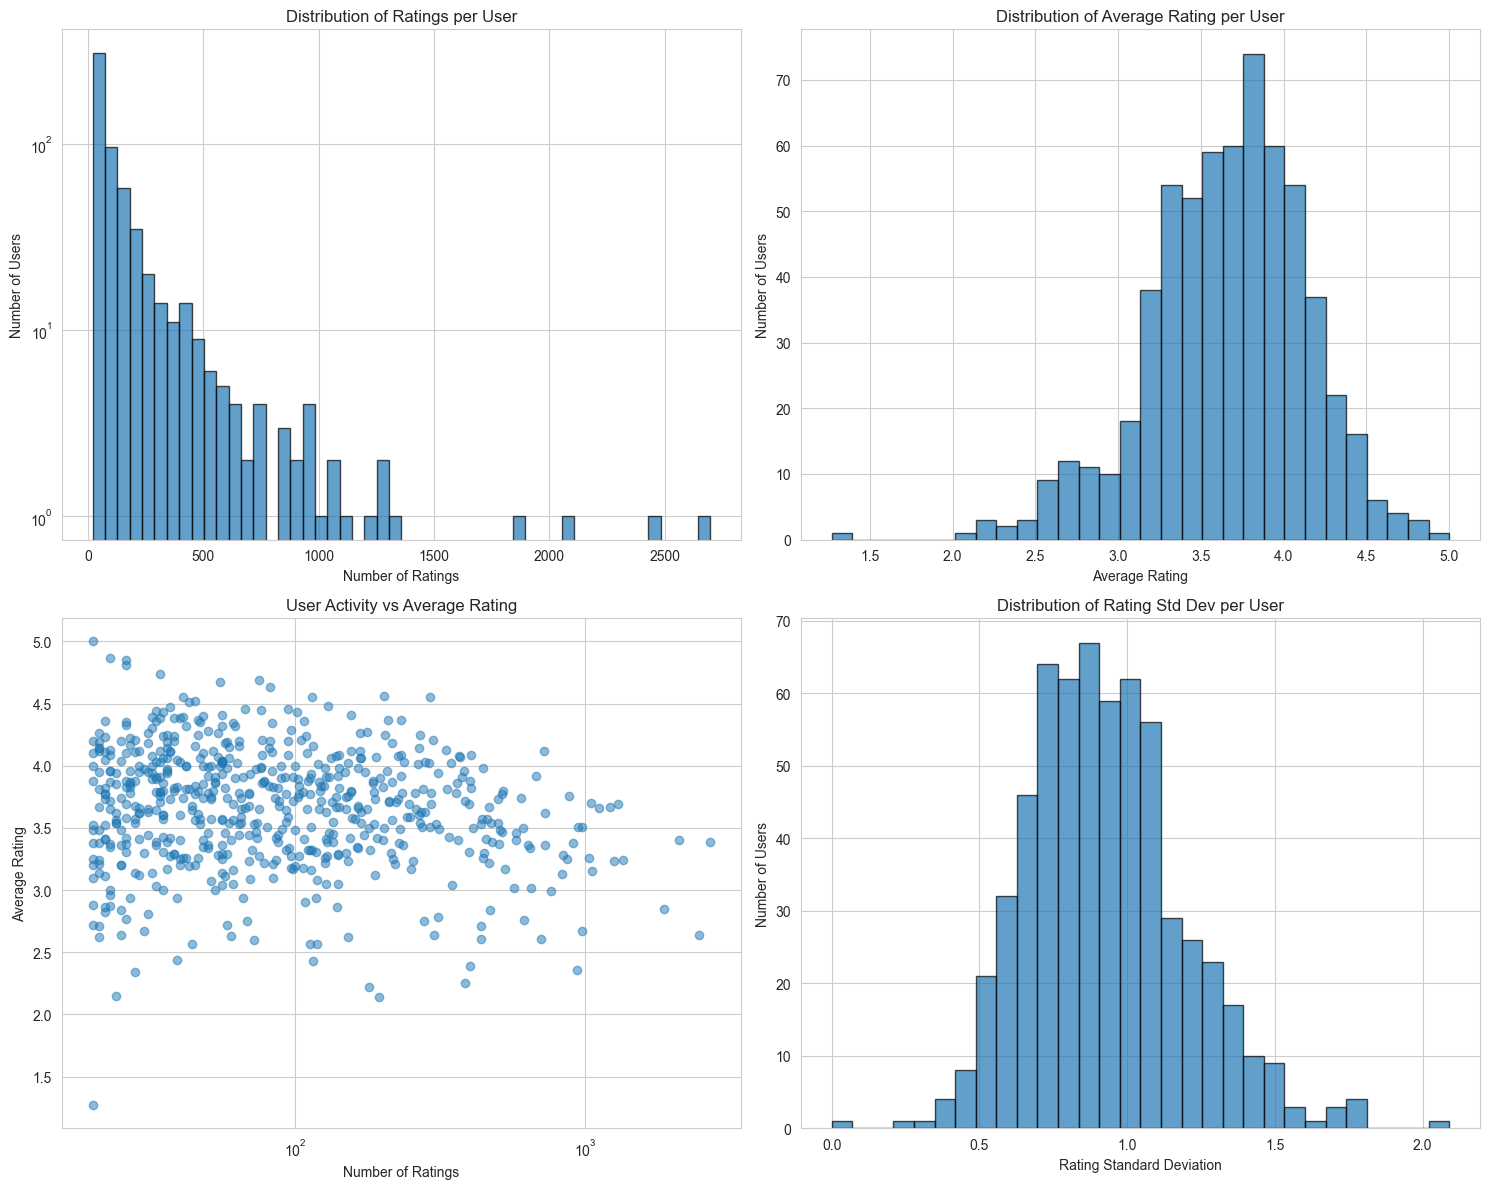


🎬 MOVIE POPULARITY ANALYSIS
🎬 MOVIE STATISTICS:
       num_ratings   avg_rating   rating_std    num_users
count  9719.000000  9719.000000  9719.000000  9719.000000
mean     10.375141     3.262404     0.541852    10.374730
std      22.406220     0.870025     0.509774    22.405731
min       1.000000     0.500000     0.000000     1.000000
25%       1.000000     2.800000     0.000000     1.000000
50%       3.000000     3.420000     0.580000     3.000000
75%       9.000000     3.910000     0.930000     9.000000
max     329.000000     5.000000     3.180000   329.000000

🔍 COLD START ANALYSIS:
   Movies with only 1 rating: 3,441
   Movies with ≤ 5 ratings: 6,451
   Movies with ≥ 100 ratings: 138

📊 DATASET SPARSITY: 0.9830 (98.30% missing)

🏷️ GENRE PREFERENCES ANALYSIS


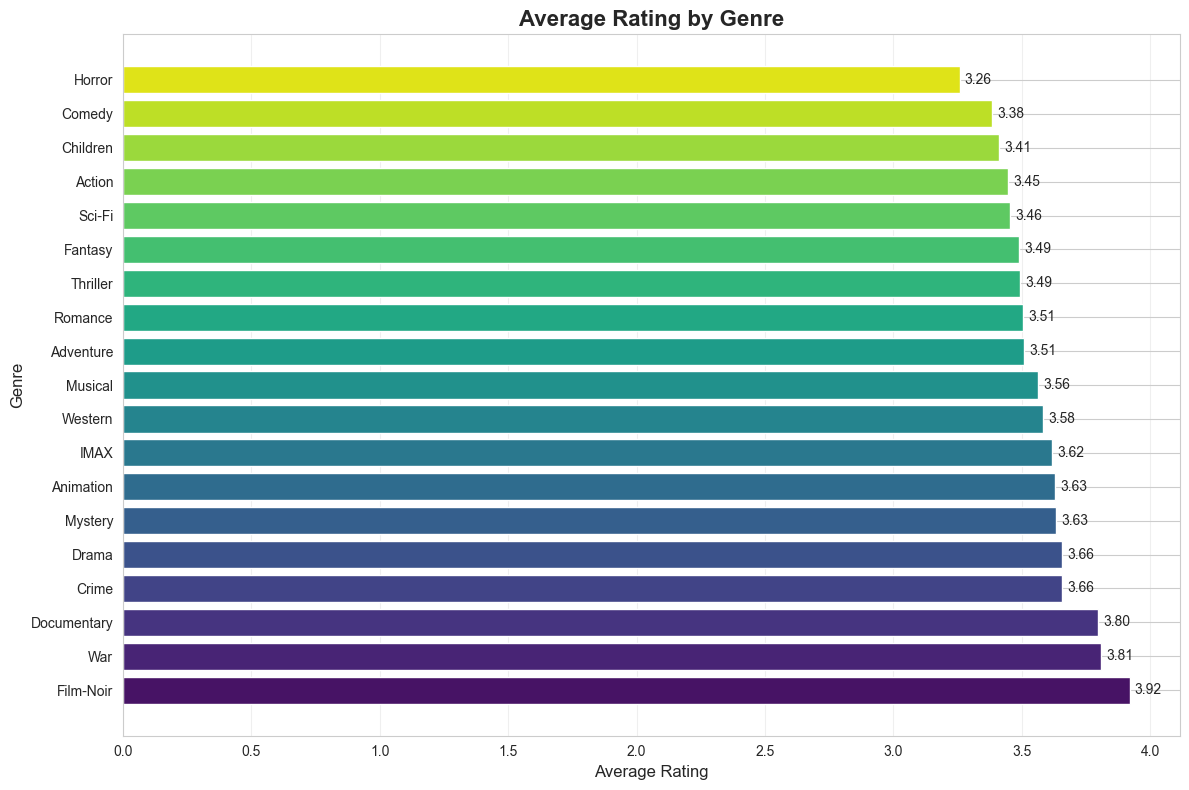

🏷️ TOP 10 GENRE AVERAGE RATINGS:
    1. Film-Noir: 3.92
    2. War: 3.81
    3. Documentary: 3.80
    4. Crime: 3.66
    5. Drama: 3.66
    6. Mystery: 3.63
    7. Animation: 3.63
    8. IMAX: 3.62
    9. Western: 3.58
   10. Musical: 3.56

✅ Advanced analysis completed!


In [8]:
# =============================================================================
# ADVANCED DATA ANALYSIS EXECUTION
# =============================================================================

print("🔬 Starting advanced data analysis...")

# Only proceed if data was loaded successfully
if not ratings_df.empty and not movies_df.empty:
    
    print("\n⏰ TEMPORAL PATTERNS ANALYSIS")
    print("="*50)
    ratings_temporal = analyze_temporal_patterns(ratings_df)
    
    print("\n👥 USER BEHAVIOR ANALYSIS")
    print("="*50)
    user_stats = analyze_user_behavior(ratings_df)
    
    print("\n🎬 MOVIE POPULARITY ANALYSIS") 
    print("="*50)
    movie_stats = analyze_movie_popularity(movie_ratings_df)
    
    print("\n🏷️ GENRE PREFERENCES ANALYSIS")
    print("="*50) 
    genre_preferences = analyze_genre_preferences(movies_df, movie_ratings_df)
    
    print("\n✅ Advanced analysis completed!")
    
else:
    print("⚠️  Skipping advanced analysis - data not loaded")
    ratings_temporal = None
    user_stats = None
    movie_stats = None
    genre_preferences = None

In [9]:
# =============================================================================
# FEATURE ENGINEERING FUNCTIONS
# =============================================================================

def create_user_features(ratings_df):
    """
    Create user-based features for machine learning
    
    Args:
        ratings_df: DataFrame containing ratings data
        
    Returns:
        DataFrame: User features
    """
    if ratings_df.empty:
        print("⚠️  No data for user feature engineering")
        return pd.DataFrame()
    
    print("👥 Creating user features...")
    
    # Basic user statistics
    user_features = ratings_df.groupby('userId').agg({
        'rating': ['count', 'mean', 'std'],
        'movieId': 'nunique',
        'timestamp': ['min', 'max']
    }).round(3)
    
    user_features.columns = ['total_ratings', 'avg_rating', 'rating_std', 
                           'movies_rated', 'first_rating_time', 'last_rating_time']
    
    # Fill NaN std with 0 for users with only one rating
    user_features['rating_std'] = user_features['rating_std'].fillna(0)
    
    # Calculate activity patterns
    user_features['activity_span_days'] = (
        user_features['last_rating_time'] - user_features['first_rating_time']
    ) / (24*3600)
    user_features['ratings_per_day'] = (
        user_features['total_ratings'] / (user_features['activity_span_days'] + 1)
    )
    
    print(f"   ✅ Created {user_features.shape[1]} user features for {user_features.shape[0]} users")
    return user_features

def create_movie_features(movie_ratings_df, movies_df):
    """
    Create movie-based features for machine learning
    
    Args:
        movie_ratings_df: Merged DataFrame with movies and ratings
        movies_df: DataFrame containing movie information
        
    Returns:
        DataFrame: Movie features
    """
    if movie_ratings_df.empty or movies_df.empty:
        print("⚠️  No data for movie feature engineering")
        return pd.DataFrame()
    
    print("🎬 Creating movie features...")
    
    # Basic movie statistics
    movie_features = movie_ratings_df.groupby('movieId').agg({
        'rating': ['count', 'mean', 'std'],
        'userId': 'nunique',
        'timestamp': ['min', 'max']
    }).round(3)
    
    movie_features.columns = ['total_ratings', 'avg_rating', 'rating_std', 
                            'users_rated', 'first_rating_time', 'last_rating_time']
    movie_features['rating_std'] = movie_features['rating_std'].fillna(0)
    
    # Merge with movie metadata
    movie_features = movie_features.merge(movies_df, on='movieId', how='left')
    
    # Extract release year from title
    movie_features['release_year'] = movie_features['title'].str.extract(r'\((\d{4})\)')
    movie_features['release_year'] = pd.to_numeric(movie_features['release_year'], errors='coerce')
    
    # Calculate movie age when first rated
    movie_features['first_rating_datetime'] = pd.to_datetime(
        movie_features['first_rating_time'], unit='s'
    )
    movie_features['age_when_first_rated'] = (
        movie_features['first_rating_datetime'].dt.year - movie_features['release_year']
    )
    
    # Popularity score
    movie_features['popularity_score'] = (
        movie_features['total_ratings'] * movie_features['avg_rating']
    )
    
    print(f"   ✅ Created {movie_features.shape[1]} movie features for {movie_features.shape[0]} movies")
    return movie_features

def create_genre_features(movies_df, movie_ratings_df):
    """
    Create genre-based features for users
    
    Args:
        movies_df: DataFrame containing movie information
        movie_ratings_df: Merged DataFrame with movies and ratings
        
    Returns:
        DataFrame: User genre preferences
    """
    if movies_df.empty or movie_ratings_df.empty:
        print("⚠️  No data for genre feature engineering")
        return pd.DataFrame()
    
    print("🏷️ Creating genre preference features...")
    
    # Create genre binary matrix
    genres_expanded = movies_df['genres'].str.get_dummies('|')
    movie_genre_features = pd.concat([movies_df[['movieId']], genres_expanded], axis=1)
    
    # Merge with ratings
    user_genre_prefs = movie_ratings_df.merge(movie_genre_features, on='movieId')
    
    # Calculate user preference for each genre (average rating)
    genre_columns = [col for col in genres_expanded.columns if col != '(no genres listed)']
    user_genre_preferences = pd.DataFrame(index=movie_ratings_df['userId'].unique())
    
    for genre in genre_columns:
        genre_ratings = user_genre_prefs[user_genre_prefs[genre] == 1].groupby('userId')['rating'].mean()
        user_genre_preferences[f'{genre}_pref'] = genre_ratings
    
    # Fill NaN with global average for that genre
    for genre in genre_columns:
        global_avg = user_genre_prefs[user_genre_prefs[genre] == 1]['rating'].mean()
        user_genre_preferences[f'{genre}_pref'] = user_genre_preferences[f'{genre}_pref'].fillna(global_avg)
    
    print(f"   ✅ Created {user_genre_preferences.shape[1]} genre preference features")
    return user_genre_preferences

def create_temporal_features(ratings_df):
    """
    Create temporal features from ratings data
    
    Args:
        ratings_df: DataFrame containing ratings data
        
    Returns:
        DataFrame: Ratings with temporal features
    """
    if ratings_df.empty:
        print("⚠️  No data for temporal feature engineering")
        return pd.DataFrame()
    
    print("⏰ Creating temporal features...")
    
    ratings_temporal = ratings_df.copy()
    ratings_temporal['datetime'] = pd.to_datetime(ratings_temporal['timestamp'], unit='s')
    ratings_temporal['year'] = ratings_temporal['datetime'].dt.year
    ratings_temporal['month'] = ratings_temporal['datetime'].dt.month
    ratings_temporal['day_of_week'] = ratings_temporal['datetime'].dt.dayofweek
    ratings_temporal['hour'] = ratings_temporal['datetime'].dt.hour
    ratings_temporal['is_weekend'] = (ratings_temporal['day_of_week'] >= 5).astype(int)
    
    # Rating recency features
    max_timestamp = ratings_temporal['timestamp'].max()
    ratings_temporal['days_since_rating'] = (
        max_timestamp - ratings_temporal['timestamp']
    ) / (24*3600)
    
    print(f"   ✅ Added temporal features to {len(ratings_temporal)} ratings")
    return ratings_temporal

def prepare_model_data(ratings_temporal, user_features, movie_features, user_genre_preferences):
    """
    Prepare data splits for machine learning models
    
    Args:
        ratings_temporal: DataFrame with temporal features
        user_features: User feature DataFrame
        movie_features: Movie feature DataFrame  
        user_genre_preferences: Genre preference DataFrame
        
    Returns:
        tuple: (train_data, val_data, test_data)
    """
    if ratings_temporal.empty:
        print("⚠️  No data for model preparation")
        return None, None, None
    
    print("📊 Preparing data for modeling...")
    
    # Sort by timestamp for chronological split
    ratings_sorted = ratings_temporal.sort_values('timestamp')
    
    # 70% train, 15% validation, 15% test
    train_size = int(0.7 * len(ratings_sorted))
    val_size = int(0.15 * len(ratings_sorted))
    
    train_data = ratings_sorted[:train_size]
    val_data = ratings_sorted[train_size:train_size + val_size]
    test_data = ratings_sorted[train_size + val_size:]
    
    print(f"   📈 Training set: {len(train_data):,} ratings")
    print(f"   📊 Validation set: {len(val_data):,} ratings")
    print(f"   📋 Test set: {len(test_data):,} ratings")
    
    return train_data, val_data, test_data

def save_processed_data(train_data, val_data, test_data, user_features, 
                       movie_features, user_genre_preferences):
    """
    Save all processed data to files
    
    Args:
        train_data, val_data, test_data: Data splits
        user_features, movie_features, user_genre_preferences: Feature DataFrames
    """
    # Create output directory
    processed_data_dir = Path('./data/processed')
    processed_data_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"💾 Saving processed data to {processed_data_dir}...")
    
    # Save data splits
    if train_data is not None:
        train_data.to_csv(processed_data_dir / 'train_data.csv', index=False)
        val_data.to_csv(processed_data_dir / 'val_data.csv', index=False)
        test_data.to_csv(processed_data_dir / 'test_data.csv', index=False)
    
    # Save feature DataFrames
    if not user_features.empty:
        user_features.to_csv(processed_data_dir / 'user_features.csv')
    if not movie_features.empty:
        movie_features.to_csv(processed_data_dir / 'movie_features.csv')
    if not user_genre_preferences.empty:
        user_genre_preferences.to_csv(processed_data_dir / 'user_genre_preferences.csv')
    
    print("   ✅ All processed data saved successfully!")

print("✅ Feature engineering functions loaded successfully!")

✅ Feature engineering functions loaded successfully!


In [10]:
# =============================================================================
# FEATURE ENGINEERING EXECUTION
# =============================================================================

print("🔧 Starting feature engineering process...")

# Only proceed if data was loaded successfully and advanced analysis completed
if not ratings_df.empty and not movies_df.empty and ratings_temporal is not None:
    
    print("\n" + "="*60)
    print("🚀 FEATURE ENGINEERING PIPELINE")
    print("="*60)
    
    # Create all feature sets
    user_features = create_user_features(ratings_df)
    movie_features = create_movie_features(movie_ratings_df, movies_df)
    user_genre_preferences = create_genre_features(movies_df, movie_ratings_df)
    ratings_temporal_final = create_temporal_features(ratings_df)
    
    # Prepare model data
    train_data, val_data, test_data = prepare_model_data(
        ratings_temporal_final, user_features, movie_features, user_genre_preferences
    )
    
    # Save all processed data
    save_processed_data(
        train_data, val_data, test_data, 
        user_features, movie_features, user_genre_preferences
    )
    
    # Display summary statistics
    print(f"\n" + "="*60)
    print("📊 FEATURE ENGINEERING SUMMARY")
    print("="*60)
    print(f"   📈 Original ratings dataset: {len(ratings_df):,} ratings")
    print(f"   👥 Users: {len(ratings_df['userId'].unique()):,}")
    print(f"   🎬 Movies: {len(ratings_df['movieId'].unique()):,}")
    print(f"   🔧 User features: {user_features.shape[1]} features")
    print(f"   🎭 Movie features: {movie_features.shape[1]} features")
    print(f"   🏷️ Genre preference features: {user_genre_preferences.shape[1]} features")
    print(f"   ⏰ Temporal features: 7 features added")
    print(f"\n   🎯 Data ready for Stage 2: Model Development!")
    
else:
    print("⚠️  Skipping feature engineering - prerequisites not met")
    print("   Please ensure data loading and advanced analysis completed successfully")

🔧 Starting feature engineering process...

🚀 FEATURE ENGINEERING PIPELINE
👥 Creating user features...
   ✅ Created 8 user features for 610 users
🎬 Creating movie features...
   ✅ Created 13 movie features for 9724 movies
🏷️ Creating genre preference features...
   ✅ Created 19 genre preference features
⏰ Creating temporal features...
   ✅ Added temporal features to 100836 ratings
📊 Preparing data for modeling...
   📈 Training set: 70,585 ratings
   📊 Validation set: 15,125 ratings
   📋 Test set: 15,126 ratings
💾 Saving processed data to data\processed...
   📈 Training set: 70,585 ratings
   📊 Validation set: 15,125 ratings
   📋 Test set: 15,126 ratings
💾 Saving processed data to data\processed...
   ✅ All processed data saved successfully!

📊 FEATURE ENGINEERING SUMMARY
   📈 Original ratings dataset: 100,836 ratings
   👥 Users: 610
   🎬 Movies: 9,724
   🔧 User features: 8 features
   🎭 Movie features: 13 features
   🏷️ Genre preference features: 19 features
   ⏰ Temporal features: 7 fe